In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('smoking.csv')

In [3]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [4]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
df.drop(columns="ID", inplace=True)

In [8]:
print(df.select_dtypes(float).columns)
len(df.select_dtypes(float).columns)

Index(['waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)',
       'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp'],
      dtype='object')


18

In [9]:
df.duplicated().sum()

11140

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(columns="oral", inplace=True)

In [13]:
df['hearing(left)'].describe()

count    44552.000000
mean         1.025611
std          0.157972
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: hearing(left), dtype: float64

In [14]:
print(df.select_dtypes(int).columns)
len(df.select_dtypes(int).columns)

Index(['age', 'height(cm)', 'weight(kg)', 'dental caries', 'smoking'], dtype='object')


5

In [15]:
print(df.select_dtypes(object).columns)
len(df.select_dtypes(object).columns)

Index(['gender', 'tartar'], dtype='object')


2

# Removing the outliers from data

In [16]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,...,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000
mean,44.210698,164.657030,65.883462,82.077186,1.011730,1.008130,1.025611,1.026037,121.529179,76.043320,...,57.288382,115.037978,14.622235,1.087022,0.886104,26.213795,27.085002,40.066103,0.213526,0.367032
std,12.089196,9.198674,12.823819,9.278384,0.488136,0.488767,0.157972,0.159247,13.688876,9.695356,...,14.795399,40.938284,1.564866,0.404948,0.226090,19.087304,31.755110,50.723940,0.409800,0.482001
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.700000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [17]:
def cal_lf_uf(q1, q3):
    IQR = q3-q1
    lf = q1-(1.5*IQR)
    uf = q3+(1.5*IQR)
    print("lf-->", lf, "uf-->", uf)
    return [lf, uf]

In [18]:
# [lf, uf] = cal_lf_uf(13922.750000, 41768.250000)

In [19]:
# plt.boxplot(df['ID'])
# plt.show()

In [20]:
[lf, uf] = cal_lf_uf(40.000000, 55.000000)

lf--> 17.5 uf--> 77.5


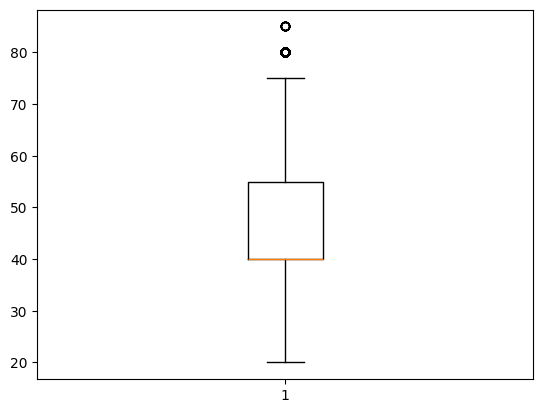

In [21]:
plt.boxplot(df['age'])
plt.show()

In [22]:
df['age'] = np.where(df['age']>uf, uf, df['age'])
df['age'] = np.where(df['age']<lf, lf, df['age'])

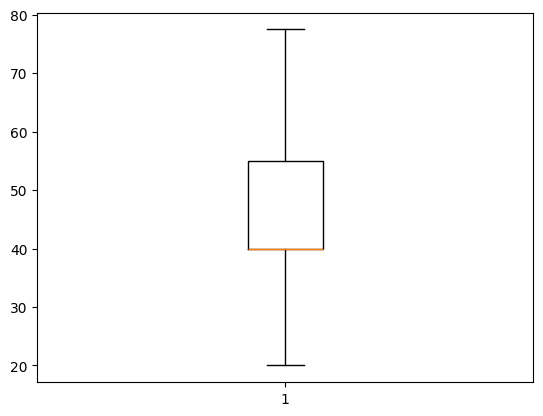

In [23]:
plt.boxplot(df['age'])
plt.show()

In [24]:
[lf, uf] = cal_lf_uf(160.000000, 170.000000)

lf--> 145.0 uf--> 185.0


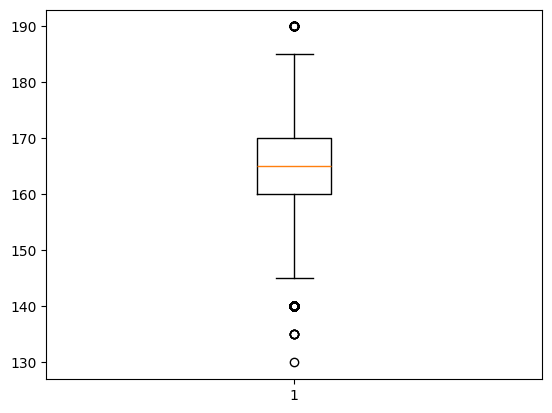

In [25]:
plt.boxplot(df['height(cm)'])
plt.show()

In [26]:
df['height(cm)'] = np.where(df['height(cm)']>uf, uf, df['height(cm)'])
df['height(cm)'] = np.where(df['height(cm)']<lf, lf, df['height(cm)'])

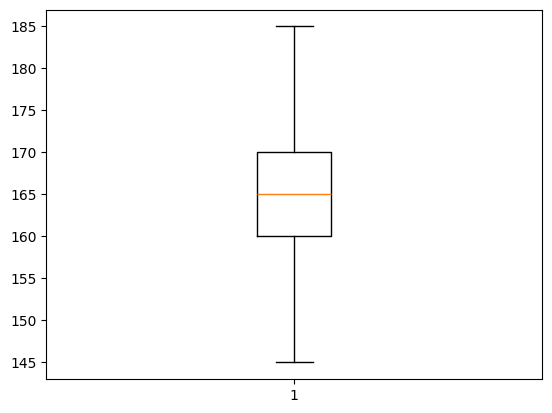

In [27]:
plt.boxplot(df['height(cm)'])
plt.show()

In [28]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,...,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000
mean,44.195378,164.674089,65.883462,82.077186,1.011730,1.008130,1.025611,1.026037,121.529179,76.043320,...,57.288382,115.037978,14.622235,1.087022,0.886104,26.213795,27.085002,40.066103,0.213526,0.367032
std,12.044849,9.140976,12.823819,9.278384,0.488136,0.488767,0.157972,0.159247,13.688876,9.695356,...,14.795399,40.938284,1.564866,0.404948,0.226090,19.087304,31.755110,50.723940,0.409800,0.482001
min,20.000000,145.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.700000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,77.500000,185.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [29]:
[lf, uf] = cal_lf_uf(55.000000, 75.000000)

lf--> 25.0 uf--> 105.0


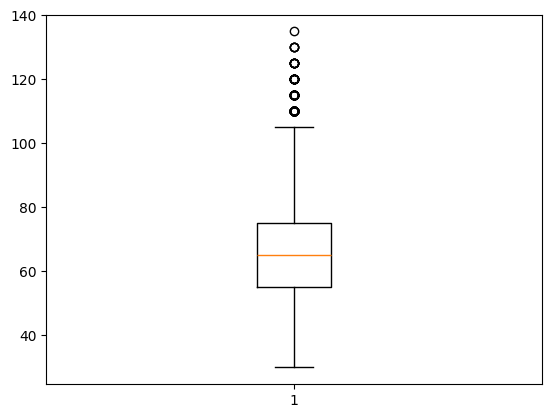

In [30]:
plt.boxplot(df['weight(kg)'])
plt.show()

In [31]:
df['weight(kg)'] = np.where(df['weight(kg)']>uf, uf, df['weight(kg)'])
df['weight(kg)'] = np.where(df['weight(kg)']<lf, lf, df['weight(kg)'])

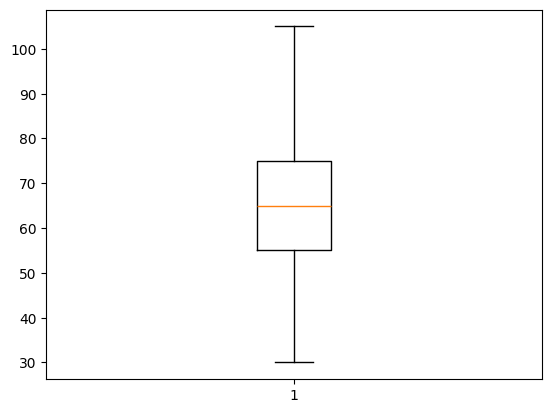

In [32]:
plt.boxplot(df['weight(kg)'])
plt.show()

In [33]:
[lf, uf] = cal_lf_uf(76.000000, 88.000000)

lf--> 58.0 uf--> 106.0


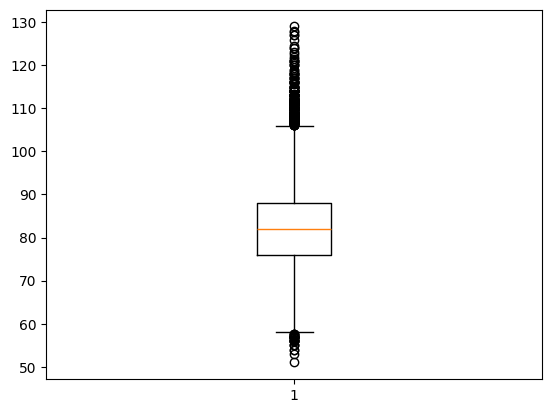

In [34]:
plt.boxplot(df['waist(cm)'])
plt.show()

In [35]:
df['waist(cm)'] = np.where(df['waist(cm)']>uf, uf, df['waist(cm)'])
df['waist(cm)'] = np.where(df['waist(cm)']<lf, lf, df['waist(cm)'])

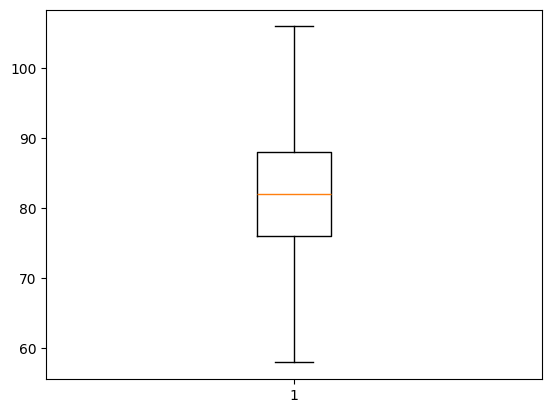

In [36]:
plt.boxplot(df['waist(cm)'])
plt.show()

In [37]:
[lf, uf] = cal_lf_uf(0.800000, 1.200000)

lf--> 0.20000000000000018 uf--> 1.7999999999999998


In [38]:
df['eyesight(left)'] = np.where(df['eyesight(left)']>uf, uf, df['eyesight(left)'])
df['eyesight(left)'] = np.where(df['eyesight(left)']<lf, lf, df['eyesight(left)'])

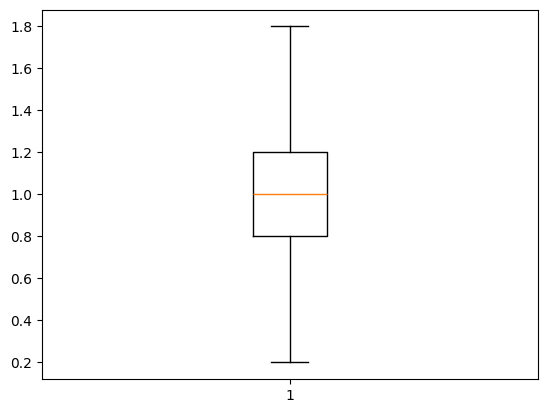

In [39]:
plt.boxplot(df['eyesight(left)'])
plt.show()

In [40]:
[lf, uf] = cal_lf_uf(0.800000, 1.200000)

lf--> 0.20000000000000018 uf--> 1.7999999999999998


In [41]:
df['eyesight(right)'] = np.where(df['eyesight(right)']>uf, uf, df['eyesight(right)'])
df['eyesight(right)'] = np.where(df['eyesight(right)']<lf, lf, df['eyesight(right)'])

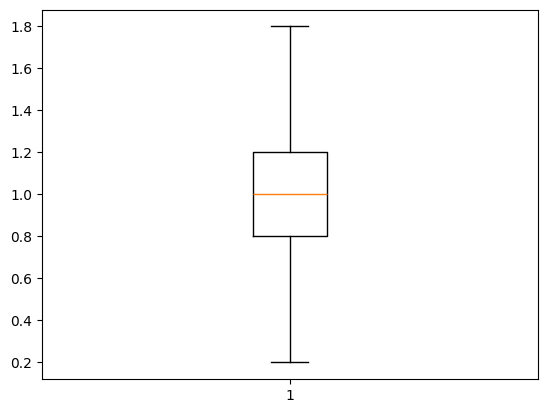

In [42]:
plt.boxplot(df['eyesight(right)'])
plt.show()

In [43]:
[lf, uf] = cal_lf_uf(1.000000, 1.000000)

lf--> 1.0 uf--> 1.0


In [44]:
df['hearing(left)'].describe()

count    44552.000000
mean         1.025611
std          0.157972
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: hearing(left), dtype: float64

In [45]:
df['hearing(left)'].unique()

array([1., 2.])

In [46]:
df['hearing(left)'] = np.where(df['hearing(left)']>uf, uf, df['hearing(left)'])
df['hearing(left)'] = np.where(df['hearing(left)']<lf, lf, df['hearing(left)'])

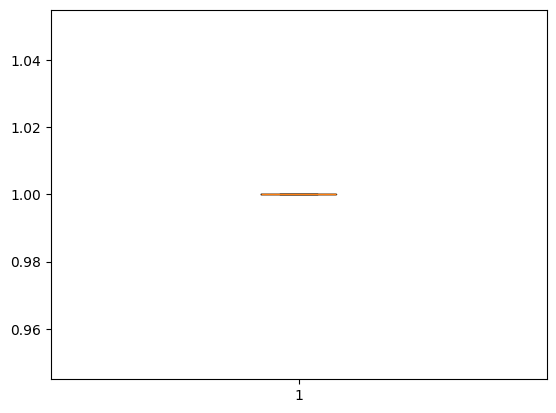

In [47]:
plt.boxplot(df['hearing(left)'])
plt.show()

In [48]:
[lf, uf] = cal_lf_uf(1.000000, 1.000000)

lf--> 1.0 uf--> 1.0


In [49]:
df['hearing(right)'] = np.where(df['hearing(right)']>uf, uf, df['hearing(right)'])
df['hearing(right)'] = np.where(df['hearing(right)']<lf, lf, df['hearing(right)'])

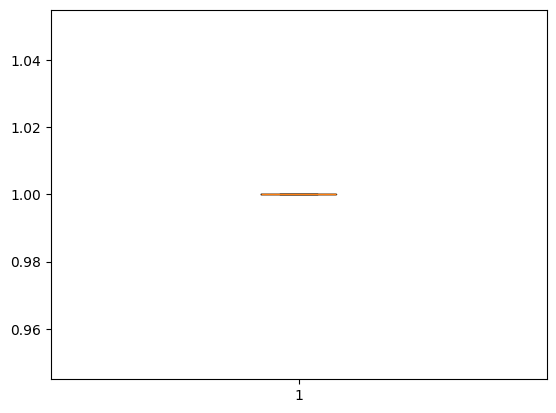

In [50]:
plt.boxplot(df['hearing(right)'])
plt.show()

In [51]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.0,44552.0,44552.000000,44552.000000,...,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000,44552.000000
mean,44.195378,164.674089,65.851477,82.037576,0.997479,0.993827,1.0,1.0,121.529179,76.043320,...,57.288382,115.037978,14.622235,1.087022,0.886104,26.213795,27.085002,40.066103,0.213526,0.367032
std,12.044849,9.140976,12.710550,9.150051,0.322699,0.321120,0.0,0.0,13.688876,9.695356,...,14.795399,40.938284,1.564866,0.404948,0.226090,19.087304,31.755110,50.723940,0.409800,0.482001
min,20.000000,145.000000,30.000000,58.000000,0.200000,0.200000,1.0,1.0,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.0,1.0,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.0,1.0,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.0,1.0,130.000000,82.000000,...,66.000000,136.000000,15.700000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,77.500000,185.000000,105.000000,106.000000,1.800000,1.800000,1.0,1.0,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [52]:
[lf, uf] = cal_lf_uf(112.000000, 130.000000)

lf--> 85.0 uf--> 157.0


In [53]:
df['systolic'] = np.where(df['systolic']>uf, uf, df['systolic'])
df['systolic'] = np.where(df['systolic']<lf, lf, df['systolic'])

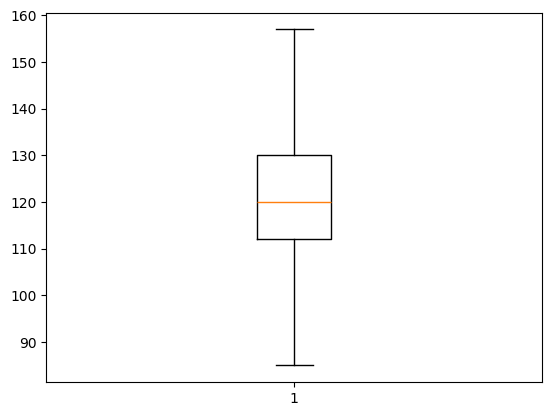

In [54]:
plt.boxplot(df['systolic'])
plt.show()

In [55]:
df.select_dtypes(float).columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp'],
      dtype='object')

In [56]:
df['relaxation'].describe()

count    44552.000000
mean        76.043320
std          9.695356
min         40.000000
25%         70.000000
50%         76.000000
75%         82.000000
max        146.000000
Name: relaxation, dtype: float64

In [57]:
[lf, uf] = cal_lf_uf(70.000000,82.000000) 

lf--> 52.0 uf--> 100.0


In [58]:
df['relaxation'] = np.where(df['relaxation']>uf, uf, df['relaxation'])
df['relaxation'] = np.where(df['relaxation']<lf, lf, df['relaxation'])

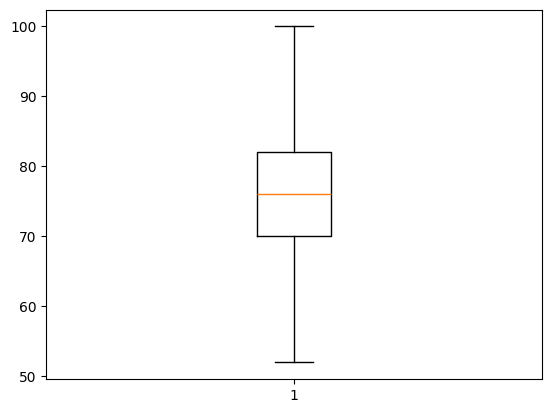

In [59]:
plt.boxplot(df['relaxation'])
plt.show()

In [60]:
df['fasting blood sugar'].describe()

count    44552.000000
mean        99.320210
std         20.845547
min         46.000000
25%         89.000000
50%         96.000000
75%        104.000000
max        505.000000
Name: fasting blood sugar, dtype: float64

In [61]:
[lf, uf] = cal_lf_uf(89.000000, 104.000000)

lf--> 66.5 uf--> 126.5


In [62]:
df['fasting blood sugar'] = np.where(df['fasting blood sugar']>uf, uf, df['fasting blood sugar'])
df['fasting blood sugar'] = np.where(df['fasting blood sugar']<lf, lf, df['fasting blood sugar'])

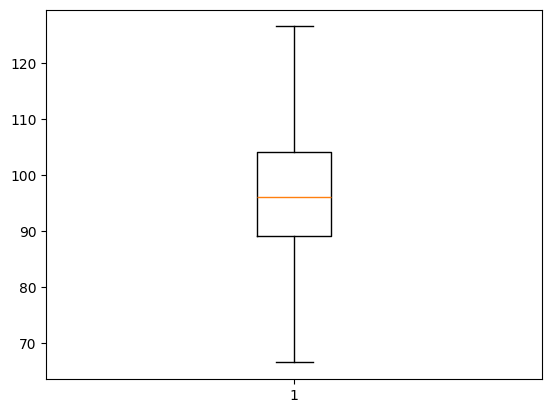

In [63]:
plt.boxplot(df['fasting blood sugar'])
plt.show()

In [64]:
df['Cholesterol'].describe()

count    44552.000000
mean       196.996005
std         36.423237
min         55.000000
25%        172.000000
50%        195.000000
75%        220.000000
max        445.000000
Name: Cholesterol, dtype: float64

In [65]:
[lf, uf] = cal_lf_uf(172.000000, 220.000000 )

lf--> 100.0 uf--> 292.0


In [66]:
df['Cholesterol'] = np.where(df['Cholesterol']>uf, uf, df['Cholesterol'])
df['Cholesterol'] = np.where(df['Cholesterol']<lf, lf, df['Cholesterol'])

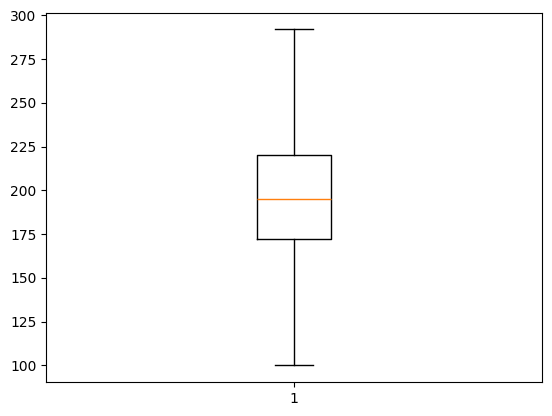

In [67]:
plt.boxplot(df['Cholesterol'])
plt.show()

In [68]:
df['triglyceride'].describe()

count    44552.000000
mean       126.722257
std         71.612721
min          8.000000
25%         74.000000
50%        108.000000
75%        160.000000
max        999.000000
Name: triglyceride, dtype: float64

In [69]:
[lf, uf] = cal_lf_uf(74.000000, 160.000000)

lf--> -55.0 uf--> 289.0


In [70]:
df['triglyceride'] = np.where(df['triglyceride']>uf, uf, df['triglyceride'])
df['triglyceride'] = np.where(df['triglyceride']<lf, lf, df['triglyceride'])

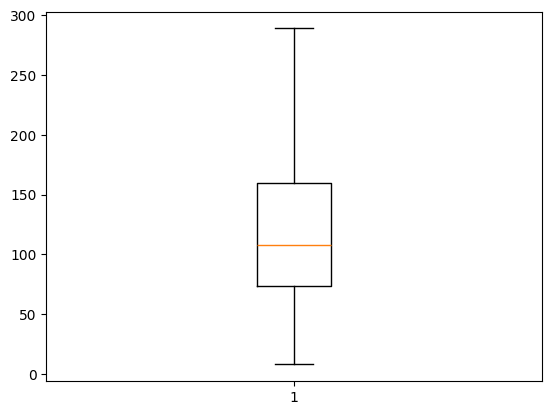

In [71]:
plt.boxplot(df['triglyceride'])
plt.show()

In [72]:
df['HDL'].describe()

count    44552.000000
mean        57.288382
std         14.795399
min          4.000000
25%         47.000000
50%         55.000000
75%         66.000000
max        618.000000
Name: HDL, dtype: float64

In [73]:
[lf, uf] = cal_lf_uf(47.000000, 66.000000)

lf--> 18.5 uf--> 94.5


In [74]:
df['HDL'] = np.where(df['HDL']>uf, uf, df['HDL'])
df['HDL'] = np.where(df['HDL']<lf, lf, df['HDL'])

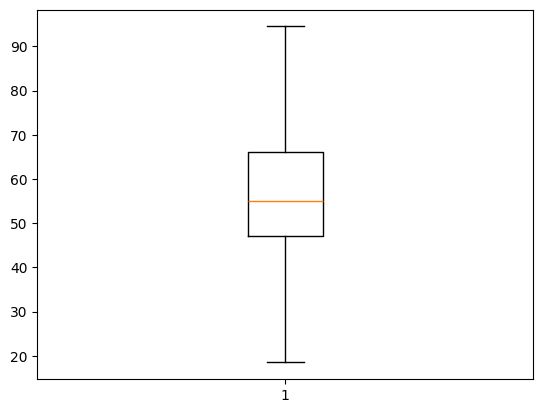

In [75]:
plt.boxplot(df['HDL'])
plt.show()

In [76]:
df['LDL'].describe()

count    44552.000000
mean       115.037978
std         40.938284
min          1.000000
25%         92.000000
50%        113.000000
75%        136.000000
max       1860.000000
Name: LDL, dtype: float64

In [77]:
[lf, uf] = cal_lf_uf(92.000000, 136.000000)

lf--> 26.0 uf--> 202.0


In [78]:
df['LDL'] = np.where(df['LDL']>uf, uf, df['LDL'])
df['LDL'] = np.where(df['LDL']<lf, lf, df['LDL'])

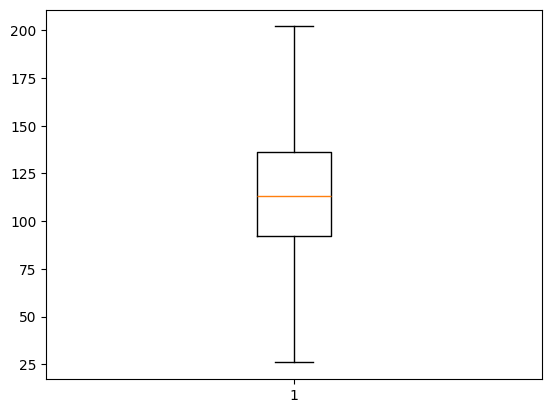

In [79]:
plt.boxplot(df['LDL'])
plt.show()

In [80]:
df.select_dtypes(float).columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp'],
      dtype='object')

In [81]:
df['hemoglobin'].describe()

count    44552.000000
mean        14.622235
std          1.564866
min          4.900000
25%         13.600000
50%         14.800000
75%         15.700000
max         21.100000
Name: hemoglobin, dtype: float64

In [82]:
[lf, uf] = cal_lf_uf(13.600000, 15.800000)

lf--> 10.299999999999997 uf--> 19.1


In [83]:
df['hemoglobin'] = np.where(df['hemoglobin']>uf, uf, df['hemoglobin'])
df['hemoglobin'] = np.where(df['hemoglobin']<lf, lf, df['hemoglobin'])

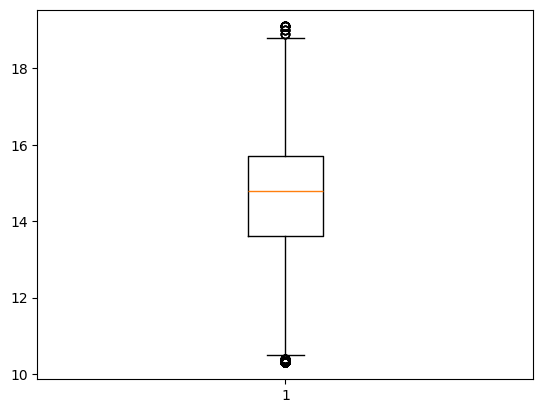

In [84]:
plt.boxplot(df['hemoglobin'])
plt.show()

In [85]:
df['Urine protein'].unique()

array([1., 3., 2., 4., 5., 6.])

In [86]:
[lf, uf] = cal_lf_uf(1.000000, 1.000000)

lf--> 1.0 uf--> 1.0


In [87]:
# df['Urine protein'] = np.where(df['Urine protein']>uf, uf, df['Urine protein'])
# df['Urine protein'] = np.where(df['Urine protein']<lf, lf, df['Urine protein'])

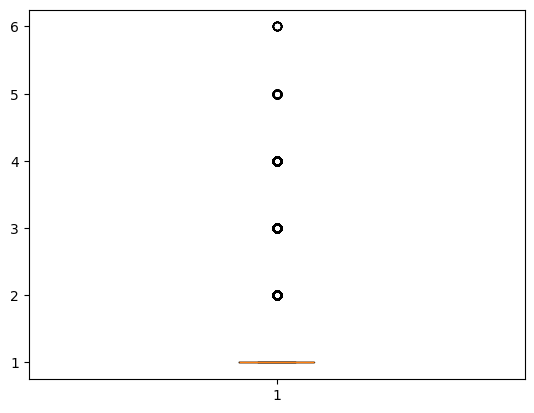

In [88]:
plt.boxplot(df['Urine protein'])
plt.show()

In [89]:
df['serum creatinine'].describe()

count    44552.000000
mean         0.886104
std          0.226090
min          0.100000
25%          0.800000
50%          0.900000
75%          1.000000
max         11.600000
Name: serum creatinine, dtype: float64

In [90]:
[lf, uf] = cal_lf_uf(0.800000, 1.000000)

lf--> 0.5000000000000001 uf--> 1.2999999999999998


In [91]:
df['serum creatinine'] = np.where(df['serum creatinine']>uf, uf, df['serum creatinine'])
df['serum creatinine'] = np.where(df['serum creatinine']<lf, lf, df['serum creatinine'])

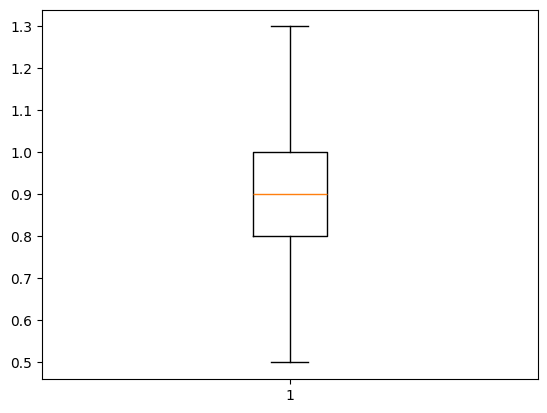

In [92]:
plt.boxplot(df['serum creatinine'])
plt.show()

In [93]:
df['AST'].describe()

count    44552.000000
mean        26.213795
std         19.087304
min          6.000000
25%         19.000000
50%         23.000000
75%         29.000000
max       1311.000000
Name: AST, dtype: float64

In [94]:
[lf, uf] = cal_lf_uf(19.000000, 28.000000)

lf--> 5.5 uf--> 41.5


In [95]:
df['AST'] = np.where(df['AST']>uf, uf, df['AST'])
df['AST'] = np.where(df['AST']<lf, lf, df['AST'])

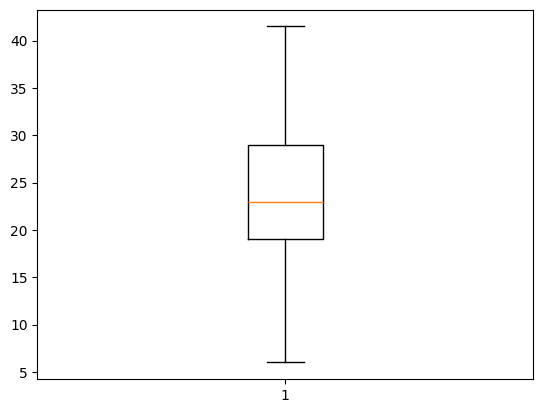

In [96]:
plt.boxplot(df['AST'])
plt.show()

In [97]:
df['ALT'].describe()

count    44552.000000
mean        27.085002
std         31.755110
min          1.000000
25%         15.000000
50%         21.000000
75%         31.000000
max       2914.000000
Name: ALT, dtype: float64

In [98]:
[lf, uf] = cal_lf_uf(15.000000, 31.000000)

lf--> -9.0 uf--> 55.0


In [99]:
df['ALT'] = np.where(df['ALT']>uf, uf, df['ALT'])
df['ALT'] = np.where(df['ALT']<lf, lf, df['ALT'])

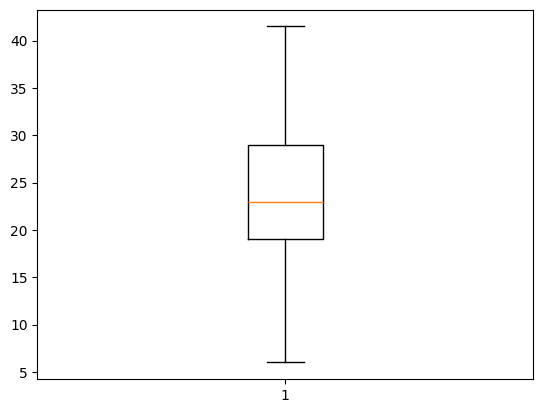

In [100]:
plt.boxplot(df['AST'])
plt.show()

In [101]:
df['Gtp'].describe()

count    44552.000000
mean        40.066103
std         50.723940
min          1.000000
25%         17.000000
50%         26.000000
75%         44.000000
max        999.000000
Name: Gtp, dtype: float64

In [102]:
[lf, uf] = cal_lf_uf(17.000000, 43.000000)

lf--> -22.0 uf--> 82.0


In [103]:
df['Gtp'] = np.where(df['Gtp']>uf, uf, df['Gtp'])
df['Gtp'] = np.where(df['Gtp']<lf, lf, df['Gtp'])

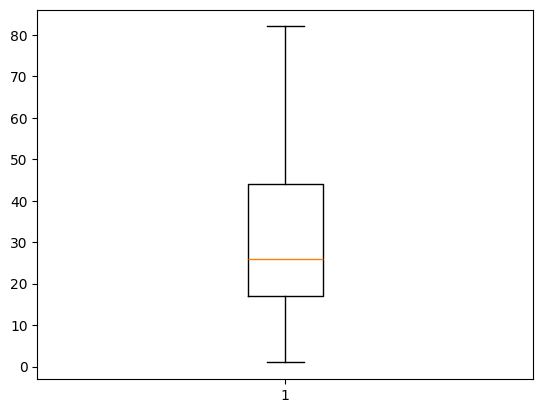

In [104]:
plt.boxplot(df['Gtp'])
plt.show()

In [105]:
df.select_dtypes(int).columns

Index(['dental caries', 'smoking'], dtype='object')

In [106]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40.0,155.0,60.0,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40.0,160.0,60.0,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55.0,170.0,60.0,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40.0,165.0,70.0,88.0,1.5,1.5,1.0,1.0,100.0,...,202.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40.0,155.0,60.0,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [107]:
df['dental caries'].describe()

count    44552.000000
mean         0.213526
std          0.409800
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dental caries, dtype: float64

In [108]:
[lf, uf] = cal_lf_uf(0.000000, 0.000000)

lf--> 0.0 uf--> 0.0


In [109]:
df['dental caries'] = np.where(df['dental caries']>uf, uf, df['dental caries'])
df['dental caries'] = np.where(df['dental caries']<lf, lf, df['dental caries'])

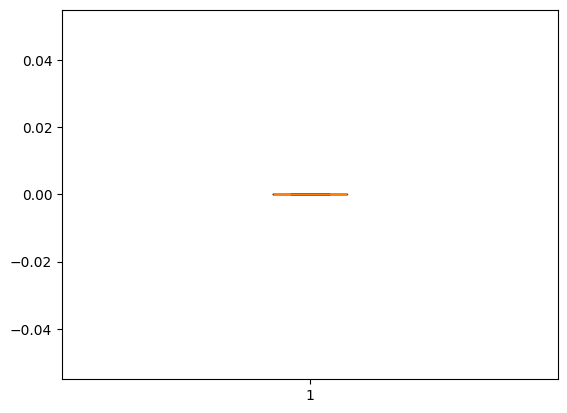

In [110]:
plt.boxplot(df['dental caries'])
plt.show()

In [111]:
df['smoking'].describe()

count    44552.000000
mean         0.367032
std          0.482001
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: smoking, dtype: float64

In [112]:
[lf, uf] = cal_lf_uf(0.000000, 1.000000)

lf--> -1.5 uf--> 2.5


In [113]:
df['smoking'] = np.where(df['smoking']>uf, uf, df['smoking'])
df['smoking'] = np.where(df['smoking']<lf, lf, df['smoking'])

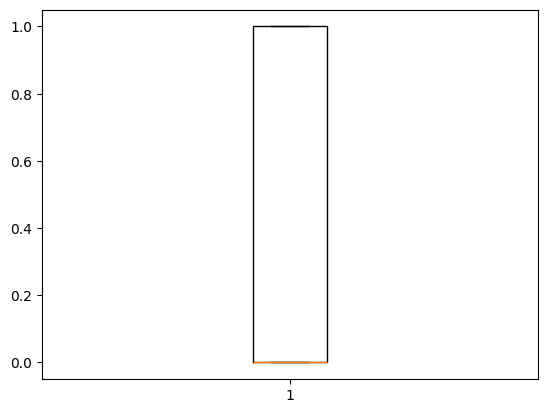

In [114]:
plt.boxplot(df['smoking'])
plt.show()

In [115]:
df.select_dtypes(object).columns

Index(['gender', 'tartar'], dtype='object')

In [116]:
df1 = pd.get_dummies(df,columns = ['gender'],drop_first=True)
# df2 = pd.get_dummies(df1,columns = ['oral'],drop_first=True)
df2 = pd.get_dummies(df1,columns = ['tartar'],drop_first=True)

In [117]:
df2.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_M,tartar_Y
0,40.0,155.0,60.0,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0.0,0.0,False,True
1,40.0,160.0,60.0,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0.0,0.0,False,True
2,55.0,170.0,60.0,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0.0,1.0,True,False
3,40.0,165.0,70.0,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0.0,0.0,True,True
4,40.0,155.0,60.0,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0.0,0.0,False,False


In [118]:
Linear_model = LinearRegression()
Log_model = LogisticRegression()
Decision_model = DecisionTreeClassifier()
Random_model = RandomForestClassifier()

In [119]:
df2.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking', 'gender_M', 'tartar_Y'],
      dtype='object')

In [120]:
y = df2["smoking"]
x = df2[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'gender_M', 'tartar_Y']]

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

In [122]:
Linear_model.fit(x_train, y_train)

LinearRegression()

In [123]:
print(Linear_model.score(x_train, y_train))
print(Linear_model.score(x_test, y_test))
# print(Linear_model.predict(x_test, y_test))

0.31635115999207786
0.30743950922071395


In [124]:
Log_model.fit(x_train, y_train)

LogisticRegression()

In [162]:
print(Log_model.score(x_train, y_train))
print(Log_model.score(x_test, y_test))

# Decision_model = DecisionTreeClassifier(criterion="gini", max_depth=100, min_samples_split=1000, min_samples_leaf=1, random_state=100)

0.7263264218175697
0.7251711367972169


In [163]:
Decision_model = DecisionTreeClassifier(criterion="gini", max_depth=100, min_samples_split=1000, min_samples_leaf=1, random_state=100)

In [164]:
Decision_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=100, min_samples_split=1000, random_state=100)

In [165]:
print("Training accuracy:", Decision_model.score(x_train, y_train))
print("Test accuracy:", Decision_model.score(x_train, y_train))

Training accuracy: 0.7537667293285822
Test accuracy: 0.7537667293285822


In [166]:
rm = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=100, random_state=88)

In [167]:
rm.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=100, random_state=88)

In [168]:
# print(Decision_model.score(x_train, y_train))
# print(Decision_model.score(x_test, y_test))

In [169]:
print(rm.score(x_train, y_train))
print(rm.score(x_test, y_test))

0.7867063213714542
0.7562563124228482


In [170]:
print(metrics.classification_report(y_train, Decision_model.predict(x_train)))
print("***********************************************************************")
print(metrics.classification_report(y_test, Decision_model.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80     22568
         1.0       0.65      0.71      0.68     13073

    accuracy                           0.75     35641
   macro avg       0.74      0.74      0.74     35641
weighted avg       0.76      0.75      0.76     35641

***********************************************************************
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79      5632
         1.0       0.63      0.70      0.66      3279

    accuracy                           0.74      8911
   macro avg       0.72      0.73      0.73      8911
weighted avg       0.75      0.74      0.74      8911



In [176]:
print(Random_model.predict(x_test))

[1. 0. 0. ... 1. 1. 0.]


In [174]:
print(y_test)

2786     0.0
41300    1.0
3875     0.0
21038    1.0
36190    0.0
        ... 
1655     1.0
39680    0.0
17076    1.0
2663     0.0
42498    0.0
Name: smoking, Length: 8911, dtype: float64


In [171]:
print(metrics.classification_report(y_train, Random_model.predict(x_train)))
print("*******************************************************************")
print(metrics.classification_report(y_test, Random_model.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22568
         1.0       1.00      1.00      1.00     13073

    accuracy                           1.00     35641
   macro avg       1.00      1.00      1.00     35641
weighted avg       1.00      1.00      1.00     35641

*******************************************************************
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      5632
         1.0       0.66      0.70      0.68      3279

    accuracy                           0.76      8911
   macro avg       0.74      0.74      0.74      8911
weighted avg       0.76      0.76      0.76      8911



In [172]:
print(metrics.classification_report(y_train, Log_model.predict(x_train)))
print("******************************************************************")
print(metrics.classification_report(y_test, Log_model.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79     22568
         1.0       0.65      0.56      0.60     13073

    accuracy                           0.73     35641
   macro avg       0.71      0.69      0.70     35641
weighted avg       0.72      0.73      0.72     35641

******************************************************************
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      5632
         1.0       0.64      0.57      0.60      3279

    accuracy                           0.73      8911
   macro avg       0.70      0.69      0.70      8911
weighted avg       0.72      0.73      0.72      8911

